## This is my implementation of a homework in Sharif University of Technology for clustering gene expression of RNA-Seq data using different methods like K-means and Gaussian Mixture Model (The codes are possibly and generally combination of different codes from different places and I don't exactly know the exact resources)

## 0. Preparation

The **gene expression cancer RNA-Seq DataSet** has gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD. Load the dataset and labels using pandas. then do train-test split.


In [1]:
import pandas as pd
# from sklearn.preprocessing import TruncatedSVD
##### ToDo: Load dataset and labels
ge_data_x = pd.read_csv("/Users/husseinjafarinia/Desktop/HW3/Dataset/data.csv")
ge_data_y = pd.read_csv("/Users/husseinjafarinia/Desktop/HW3/Dataset/labels.csv")
#############

##### ToDo: Split the data to train(80%) and test(20%)
from sklearn.model_selection import train_test_split
X_total = ge_data_x
y_total = ge_data_y
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.30, random_state = 0)
#############

## 1. Dimensionality Reduction
There are too many gene expressions(attributes) for each instance. To plot the data, we need to reduce the dimensions to 2. In this section you will reduce the dimensions of the dataset by various methods. After reducing the dimensions, plot the dimension reduced instances, each colored according to its cancer type. 

### 1.1 SVD
This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA(wich we will use in next section), this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

Apply SVD on gene expression cancer RNA-Seq dataSet using Scikit Learn and plot the result.

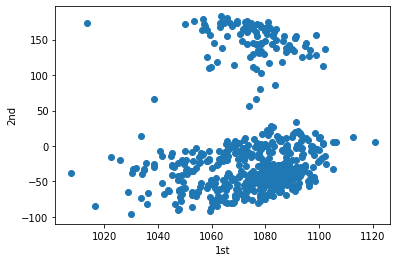

In [2]:
##### ToDo: Apply SVD
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
svd = TruncatedSVD(n_components=2, n_iter=5, random_state=42)
X_train_numpy = X_train.to_numpy()[:,1:]
svd.fit(X_train_numpy)
X_train_numpy_reduced_SVD = svd.transform(X_train_numpy)
plt.scatter(X_train_numpy_reduced_SVD[:,0], X_train_numpy_reduced_SVD[:,1])
plt.xlabel("1st")
plt.ylabel("2nd")
plt.show()
#############

### 1.2 PCA
Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data

Apply PCA on gene expression cancer RNA-Seq dataSet using Scikit Learn and plot the result.

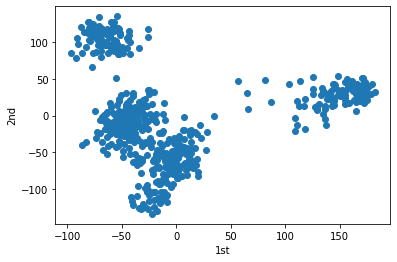

In [3]:
##### ToDo: Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_numpy)
X_train_numpy_reduced_PCA = pca.transform(X_train_numpy)
# y_train_numpy = y_train.to_numpy()[:,1:]
plt.scatter(X_train_numpy_reduced_PCA[:,0], X_train_numpy_reduced_PCA[:,1])
plt.xlabel("1st")
plt.ylabel("2nd")
plt.show()
#############

### 1.3 t-SNE
t-SNE converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

Apply t-SNE on gene expression cancer RNA-Seq dataSet using Scikit Learn and plot the result.

/Users/husseinjafarinia/venvs/ML_For_Bio/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


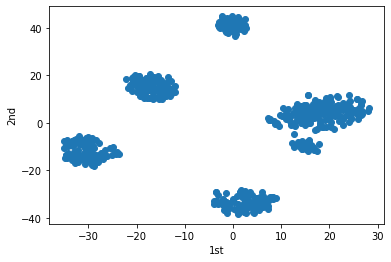

In [4]:
##### ToDo: Apply t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X_total_numpy = X_total.to_numpy()[:,1:]
X_total_numpy_embedded = TSNE(n_components=2, learning_rate='auto').fit_transform(X_total_numpy)
y_total.to_numpy()[:,1:]
# y_train_numpy = y_train.to_numpy()[:,1:]
# y_test_numpy = y_train.to_numpy()[:,1:]
X_train_numpy_embedded, X_test_numpy_embedded, y_train, y_test = train_test_split(X_total_numpy_embedded, y_total, test_size = 0.30, random_state = 0)
plt.scatter(X_train_numpy_embedded[:,0], X_train_numpy_embedded[:,1])
plt.xlabel("1st")
plt.ylabel("2nd")
plt.show()
#############

### 1.4 Kernel PCA

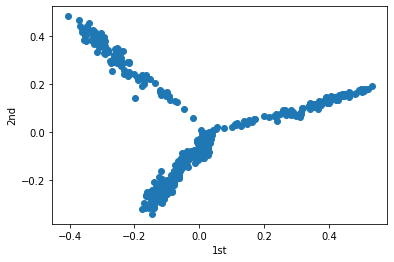

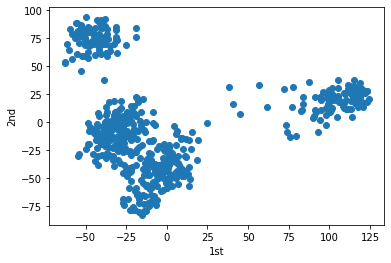

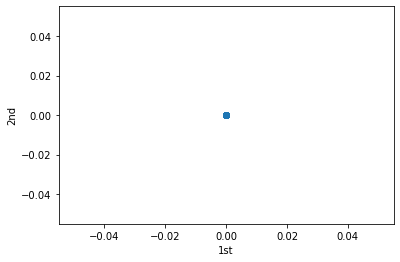

In [5]:
##### ToDo: Apply Kernel PCA on dataset using different kernels: 'rbf', 'poly' and 'sigmoid'
#rbf
from sklearn.decomposition import KernelPCA
transformer_rbf = KernelPCA(n_components=2, kernel='rbf')
X_train_numpy = X_train.to_numpy()[:,1:]
X_transformed_rbf = transformer_rbf.fit_transform(X_train_numpy)
plt.scatter(X_transformed_rbf[:,0], X_transformed_rbf[:,1])
plt.xlabel("1st")
plt.ylabel("2nd")
plt.show()
#poly
transformer_poly = KernelPCA(n_components=2, kernel='poly')
X_train_numpy = X_train.to_numpy()[:,1:]
X_transformed_poly = transformer_poly.fit_transform(X_train_numpy)
plt.scatter(X_transformed_poly[:,0], X_transformed_poly[:,1])
plt.xlabel("1st")
plt.ylabel("2nd")
plt.show()
#signoid
transformer_sigmoid = KernelPCA(n_components=2, kernel='sigmoid')
X_train_numpy = X_train.to_numpy()[:,1:]
X_transformed_sigmoid = transformer_sigmoid.fit_transform(X_train_numpy)
plt.scatter(X_transformed_sigmoid[:,0], X_transformed_sigmoid[:,1])
plt.xlabel("1st")
plt.ylabel("2nd")
plt.show()
#############

## 2. Clustering
In this section, you will use two clustering methods to cluster the dataset instances according to gene expressions. In both methods, set the number of clusters to five, as there are five cancer types in the dataset. After clustering by each method, use ground truth labels to evaluate the model and get an accuracy measure of the classification of instances.

### 2.1 k-Means
The k-Means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

Apply k-Means on the best results of the dimension reduction methods in previous steps by Scikit Learn, plot the results of clustering and get accuracy of the model according to ground truth labels.

1.0


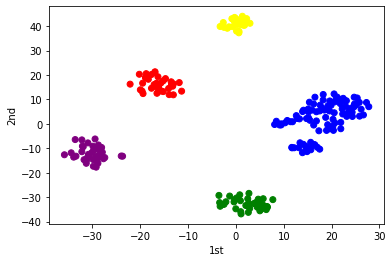

In [6]:
##### ToDo: Apply k-Means
from sklearn.cluster import KMeans
import numpy as np
#reducing dimensions of X_test with the best method
X_train_numpy_embedded, X_test_numpy_embedded, y_train, y_test = train_test_split(X_total_numpy_embedded, y_total, test_size = 0.30, random_state = 0)
y_train_numpy = y_train.to_numpy()[:,1:]
y_test_numpy = y_test.to_numpy()[:,1:]
#kmeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train_numpy_embedded)
kmeans_result = kmeans.predict(X_test_numpy_embedded)
# real_label_kmeans_label_mapping = dict()
#evaluation
y_test_numpy = y_test_numpy.reshape(-1) #making numpy version of y_test because it's needed
tp, not_tp = 0, 0
def MOST_FREQUENT(List):
    cnt = 0
    num = List[0]
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency > cnt):
            cnt = curr_frequency
            num = i
    return num
votes = {"BRCA": [], "KIRC": [], "COAD": [], "LUAD": [], "PRAD": []}
for i in range(len(y_test_numpy)):
    votes[y_test_numpy[i]].append(kmeans_result[i])
for i in votes:
    votes[i] = MOST_FREQUENT(votes[i])
#majority voting approach
for i in range(len(y_test_numpy)):
    if votes[y_test_numpy[i]] == kmeans_result[i]:
        tp += 1
    else:
        not_tp += 1
accuracy = tp / (tp + not_tp)
print(accuracy)
#first is the one approach
# for i in range(len(kmeans_result)):
#     if kmeans_result[i] not in real_label_kmeans_label_mapping:
#         real_label_kmeans_label_mapping[kmeans_result[i]] = y_test_numpy[i]
#     if real_label_kmeans_label_mapping[kmeans_result[i]] == y_test_numpy[i]:
#         tp += 1
#     else:
#         not_tp += 1
# accuracy = tp / (tp + not_tp)
# print(accuracy)
import matplotlib
colors = ['red','green','blue','purple', "yellow"]
plt.scatter(X_test_numpy_embedded[:,0], X_test_numpy_embedded[:,1], c=kmeans_result, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel("1st")
plt.ylabel("2nd")
plt.show()
#############

### 2.2 Expectation-Maximization
Here we are using Gaussian Mixture Models to cluster dimension reduced data using EM algorithm by scikit learn. Write necessary codes in "ToDo" boxes to train GMMs, measure the accuracy of the model and plot the results.

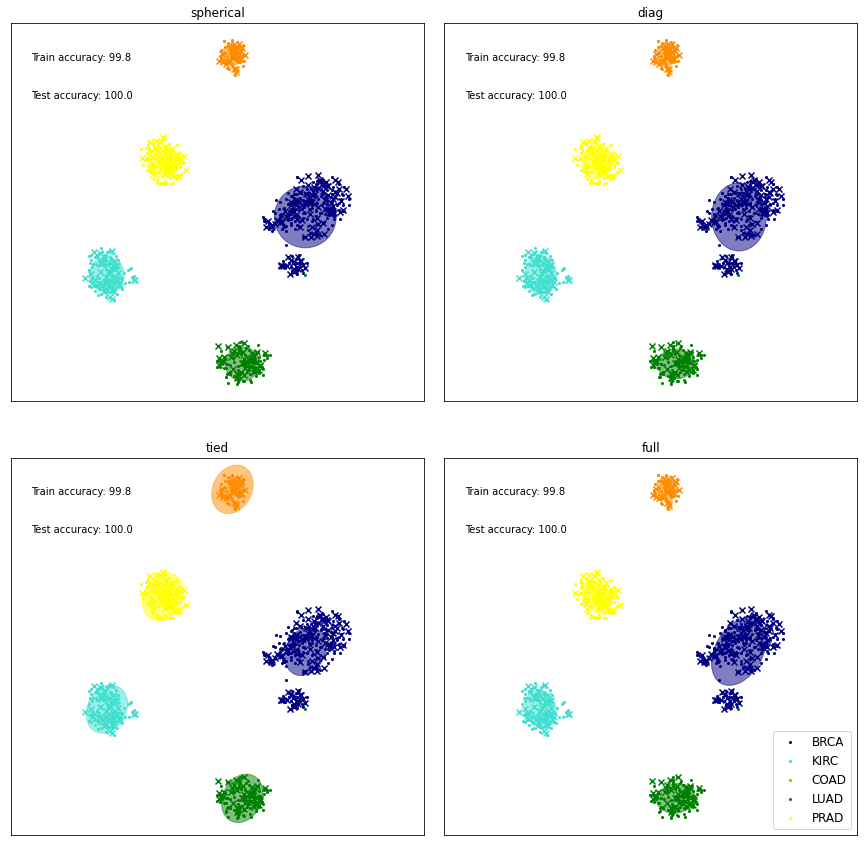

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

colors = ["navy", "turquoise", "darkorange", 'green', 'yellow']
cancer_types = ["BRCA", "KIRC", "COAD", "LUAD", "PRAD"]


def make_ellipses(gmm, ax):
    # Draw a covariance confidence ellipse. Visit this website for more info.: 
    # https://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/
    
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances) # get eigen values and eigen vectors for covariance matrix
        u = w[0] / np.linalg.norm(w[0]) # normalize first eigen vector
        angle = np.arctan2(u[1], u[0]) # get rotation of ellipse using angle of first eigen vector
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v) # get major axis length
        ell = mpl.patches.Ellipse(
            gmm.means_[n], v[0], v[1], 180 + angle, color=color
        ) # draw ellipse using matplotlib
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")
        
cov_types = ["spherical", "diag", "tied", "full"]
n_estimators = len(cov_types)

plt.figure(figsize=(6 * n_estimators // 2, 12))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)
        
##### ToDo: Use the data of best dimension reduction method used in previous steps
##### (with 80% of data as train and 20% as test)
X_reduced_train = X_train_numpy_embedded.copy()
y_train = y_train_numpy.copy()
X_reduced_test = X_test_numpy_embedded.copy()
y_test = y_test_numpy.copy()
#############

n_classes = len(np.unique(y_train))

##### ToDo: Define four GMMs with different covariance matrix
##### types "spherical", "diag", "tied" and "full" in GMM implementation of scikit learn.
##### Explain differences between these four covariance matrix types in the next cell.

estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}
cancer_types = ["BRCA", "KIRC", "COAD", "LUAD", "PRAD"]
y_train[y_train[:,0] == "BRCA"] = 0
y_train[y_train[:,0] == "KIRC"] = 1
y_train[y_train[:,0] == "COAD"] = 2
y_train[y_train[:,0] == "LUAD"] = 3
y_train[y_train[:,0] == "PRAD"] = 4
y_test[y_test[:] == "BRCA"] = 0
y_test[y_test[:] == "KIRC"] = 1
y_test[y_test[:] == "COAD"] = 2
y_test[y_test[:] == "LUAD"] = 3
y_test[y_test[:] == "PRAD"] = 4
y_train =  y_train.flatten()


for index, (name, estimator) in enumerate(estimators.items()):
    
##### ToDo: Since we have class labels for the training data, we can initialize
##### the GMM means in a supervised manner. So set initial value of clusters mean
##### (guassian means) to mean of each cancer type instances.
    # np.hstack((X_reduced_train, y_train))[(np.hstack((X_reduced_train, y_train))[:, 2] == cancer_types[i]), :].mean(axis = 0)
    estimator.means_init = [np.hstack((X_reduced_train, y_train.reshape(-1, 1)))[(np.hstack((X_reduced_train, y_train.reshape(-1, 1)))[:, 2] == i), :][:,0:2].mean(axis = 0) for i in range(n_classes)]




#############

    #Train the other parameters of GMMs using the EM algorithm.
    estimator.fit(X_reduced_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)
    
    # Plot the train data with dots
    for n, color in enumerate(colors):
        data = X_reduced_train[np.array(y_train)==n]
        plt.scatter(data[:, 0], data[:, 1], s=4.2, color=color, label = cancer_types[n])
        
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_reduced_test[np.array(y_test) == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

##### ToDo: Predict on test data and get accuracy of the model
    y_train_pred = estimator.predict(X_reduced_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_reduced_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)
#############

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

##### ##### ToDo: Explain differences between four covariance matrix types
Full means the components may independently adopt any position and shape.
Tied means they have the same shape, but the shape may be anything.
Diagonal means the contour axes are oriented along the coordinate axes, but otherwise the eccentricities may vary between components.
Spherical is a "diagonal" situation with circular contours (spherical in higher dimensions, whence the name).
#############